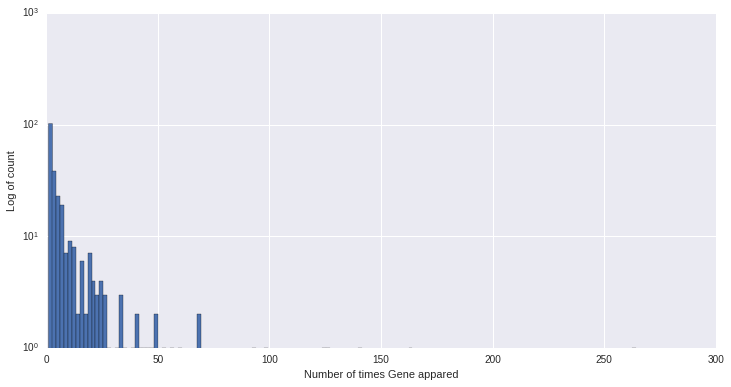

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/seaborn/categorical.py:1165: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Counter({'BRCA1': 264, 'TP53': 163, 'EGFR': 141, 'PTEN': 126, 'BRCA2': 125, 'KIT': 99, 'BRAF': 93, 'ERBB2': 69, 'ALK': 69, 'PDGFRA': 60, 'PIK3CA': 56, 'CDKN2A': 52, 'FGFR2': 50, 'FLT3': 49, 'TSC2': 47, 'MTOR': 45, 'KRAS': 44, 'MAP2K1': 43, 'VHL': 41, 'RET': 40, 'FGFR3': 39, 'MLH1': 35, 'MET': 33, 'JAK2': 33, 'SMAD4': 33, 'NOTCH1': 31, 'AKT1': 28, 'PTPN11': 26, 'ROS1': 26, 'ABL1': 26, 'CTNNB1': 25, 'CBL': 25, 'PIK3R1': 24, 'RUNX1': 24, 'SMAD3': 23, 'PDGFRB': 23, 'PTPRT': 23, 'NFE2L2': 22, 'HRAS': 22, 'MSH2': 21, 'SMO': 21, 'ERBB4': 20, 'TSC1': 20, 'SPOP': 20, 'AR': 20, 'SMAD2': 19, 'ERCC2': 19, 'FBXW7': 19, 'JAK1': 18, 'RHOA': 17, 'IDH1': 16, 'PMS2': 16, 'ESR1': 16, 'SF3B1': 16, 'NF1': 16, 'NTRK1': 16, 'KEAP1': 14, 'TET2': 14, 'FGFR1': 13, 'CCND1': 13, 'STK11': 13, 'MSH6': 13, 'RAF1': 12, 'PPP2R1A': 12, 'NRAS': 12, 'CARD11': 12, 'ERBB3': 11, 'NF2': 11, 'MAP2K2': 11, 'AKT2': 11, 'EWSR1': 11, 'RB1': 10, 'POLE': 10, 'CDK12': 10, 'PIK3CB': 10, 'CDH1': 9, 'BAP1': 9, 'MAP2K4': 9, 'EP300': 9, 

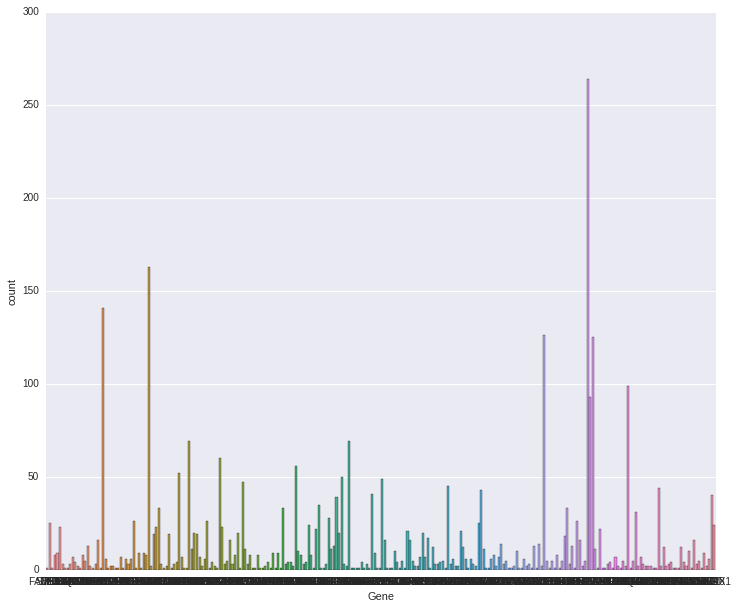

In [2]:

from gensim.summarization import summarize
from gensim.summarization import keywords


from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

# Word cloud visualization libraries
from scipy.misc import imresize
from PIL import Image

from collections import Counter

# Word2Vec related libraries
from gensim.models import KeyedVectors

#NLP

#Importing dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Importing Dataset
#import os

import os
os.chdir('/home/shraddha/cancer')
source= '/home/shraddha/cancer'

train_variant = pd.read_csv(source+'/training_variants')
test_variant = pd.read_csv(source+'/test_variants')

train_text = pd.read_csv(source+'/training_text',sep = '\|\|', engine= 'python', header=None, 
                     skiprows=1, names=["ID","Text"])
test_text = pd.read_csv(source+'/test_text',sep = '\|\|', engine= 'python', header=None, 
                     skiprows=1, names=["ID","Text"])

train = pd.merge(train_variant, train_text, how = 'left', on = 'ID').fillna('')
test = pd.merge(test_variant, test_text, how = 'left', on = 'ID').fillna('')


#Data Exploration
train.Gene.nunique()
train['Gene'].unique()

k = train.groupby('Gene')['Gene'].count()

plt.figure(figsize=(12,6))
plt.hist(k, bins=150,log=True)
plt.xlabel('Number of times Gene appeared')
plt.ylabel('Log of count')
plt.show()

#count Gene
from collections import Counter
plt.figure(figsize=(12,10))
sns.countplot((train['Gene']))
plt.xticks()
genecount = Counter(train['Gene'])
print(genecount,'\n',len(genecount))

#train.Variation.nunique()
#train['Variation'].unique()
#k = train.groupby('Variation')['Variation'].count()

plt.figure(figsize=(12,6))